## The output of the program should be a vector of the predicted labels preds for all test points 

In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ocr = loadmat('ocr.mat')
num_features = len(ocr['data'][0])
data_test = ocr['testdata'].astype('float')
labels_test = ocr['testlabels']

In [3]:
def KNN(data_train,labels_train):
    preds = [] 
    data_train_square = (data_train**2).sum(axis=1)
    data_test_square = (data_test**2).sum(axis=1)
    distances = np.matmul(data_train, data_test.T)
    distances *= -2
    distances = np.add(distances,data_test_square.T)
    distances = np.add(data_train_square.reshape(len(data_train),1),distances)
    distances = np.sqrt(distances)
    matrix_final = np.zeros_like(distances)
    test_label_indices = distances.argmin(axis=0)
    preds = labels_train[test_label_indices]
    return preds

## Evaluating the nearest neighbor classifier

In [11]:
n = [1000, 2000, 4000, 8000]
test_error_rate = []

for j in xrange(10):
    for index,i in enumerate(n):
        sel = random.sample(xrange(60000),i)
        sel_data = ocr['data'][sel].astype('float')
        sel_labels = ocr['labels'][sel]
        preds = KNN(sel_data,sel_labels)
        num_correct_predictions = sum(np.equal(labels_test,preds))[0]
        if j==0:
            test_error_rate.append(float(10000-num_correct_predictions)/10000)
        else:
            test_error_rate[index] = test_error_rate[index] + (float(10000-num_correct_predictions)/10000)

average_test_error_rate = [x / 10.0 for x in test_error_rate]

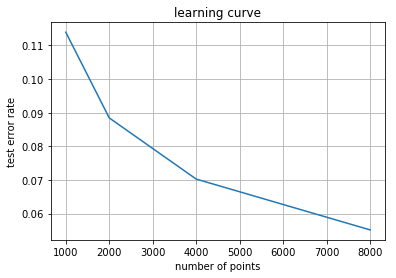

In [12]:
plt.plot(n, average_test_error_rate)
plt.xlabel('number of points')
plt.ylabel('test error rate')
plt.title('learning curve')
plt.grid(True)
plt.savefig("learningcurve.png")
plt.show()

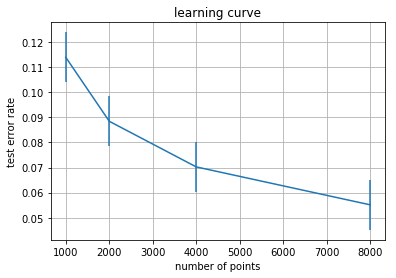

In [15]:
plt.errorbar(n, average_test_error_rate,yerr=0.01)
plt.xlabel('number of points')
plt.ylabel('test error rate')
plt.title('learning curve')
plt.grid(True)
plt.savefig("learningcurve.png")
plt.show()